In [27]:
%matplotlib inline

import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [28]:
input_file = "../data/raw/tetuancity.csv"
#output_path = "../../data/synthetic_fishing/"


In [29]:
full_data = pd.read_csv(input_file, index_col=0)


In [30]:
#full_data = full_data.fillna(0).dropna()
full_data = full_data.dropna()


In [31]:
# Check for NaN or null values in the dataset
nan_summary = full_data.isnull().sum()

# Total number of NaN values in the dataset
total_nan = full_data.isnull().sum().sum()

# Display columns with NaN values and their counts
print("NaN Counts Per Column:")
print(nan_summary[nan_summary > 0])  # Show only columns with NaN values

print(f"\nTotal number of NaN values in the dataset: {total_nan}")


NaN Counts Per Column:
Series([], dtype: int64)

Total number of NaN values in the dataset: 0


In [9]:
full_data.describe()


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,conso
count,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000
mean,18.809908,68.262517,1.957940,182.602030,75.205489,32300.704024,21016.211637,17821.675092,71138.590754
std,5.817027,15.548831,2.348577,264.519979,124.387253,7105.963336,5180.423053,6617.137789,17100.539043
min,3.541000,11.570000,0.050000,0.007000,0.030000,14327.088610,8897.352342,5935.174070,37537.523580
25%,14.417500,58.335000,0.078000,0.062000,0.122000,26331.450978,16996.327467,13052.108475,56541.186655
50%,18.805000,69.885000,0.086000,4.735500,4.338500,32220.995135,20848.739430,16388.259350,69763.996080
75%,22.920000,81.400000,4.914000,317.475000,100.975000,37261.592920,24665.913377,21618.075310,83552.726515
max,40.010000,94.700000,5.690000,1163.000000,903.000000,51955.072140,36482.787750,47580.251050,133194.098800


In [10]:
full_data.columns


Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'conso'],
      dtype='object')

In [11]:
full_data.info


<bound method DataFrame.info of                      Temperature  Humidity  Wind Speed  general diffuse flows  \
date                                                                            
2017-01-01 00:00:00        6.559     73.80       0.083                  0.051   
2017-01-01 01:00:00        5.641     77.70       0.080                  0.048   
2017-01-01 02:00:00        5.059     78.60       0.081                  0.070   
2017-01-01 03:00:00        5.169     77.90       0.083                  0.066   
2017-01-01 04:00:00        4.753     75.70       0.083                  0.044   
...                          ...       ...         ...                    ...   
2017-12-30 19:00:00        9.920     61.15       0.073                  0.062   
2017-12-30 20:00:00        9.020     63.38       0.075                  0.048   
2017-12-30 21:00:00        8.800     65.49       0.082                  0.088   
2017-12-30 22:00:00        8.090     68.49       0.079                  0.070

In [12]:
full_data.head()


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,conso
date,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544
2017-01-01 01:00:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024,60937.36065
2017-01-01 02:00:00,5.059,78.6,0.081,0.070,0.096,23003.54430,15169.60486,16117.59036,54290.73952
2017-01-01 03:00:00,5.169,77.9,0.083,0.066,0.108,21107.84810,13535.56231,15140.24096,49783.65137
2017-01-01 04:00:00,4.753,75.7,0.083,0.044,0.134,20524.55696,12820.66869,14585.06024,47930.28589


In [13]:
full_data.tail()


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,conso
date,,,,,,,,,
2017-12-30 19:00:00,9.92,61.15,0.073,0.062,0.096,37694.29658,32623.50414,16825.93037,87143.73109
2017-12-30 20:00:00,9.02,63.38,0.075,0.048,0.130,37146.76806,32373.12059,16941.17647,86461.06512
2017-12-30 21:00:00,8.80,65.49,0.082,0.088,0.115,36343.72624,31345.81160,16877.79112,84567.32896
2017-12-30 22:00:00,8.09,68.49,0.079,0.070,0.085,34920.15209,29445.84228,16053.78151,80419.77588
2017-12-30 23:00:00,7.07,72.50,0.080,0.059,0.093,32158.17490,27273.39675,14987.75510,74419.32675


In [14]:
df = full_data.copy()


In [15]:
l, sh, dim, siz = len(df), df.shape, df.ndim, df.size


In [16]:
print(l, sh, dim, siz)


8736 (8736, 9) 2 78624


In [17]:
rdf = df.to_numpy().reshape(df.shape[0], df.shape[1], 1)
rdf.shape


(8736, 9, 1)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

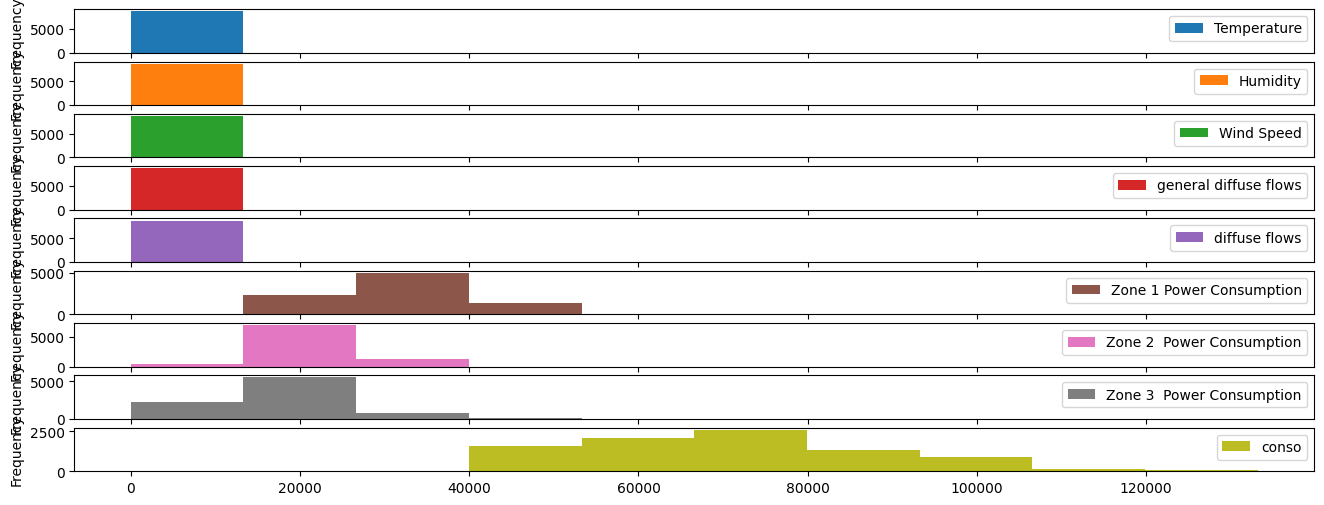

In [18]:
df.plot(kind='hist', subplots=True, figsize=(16, 6))


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Wind Speed'}>],
       [<Axes: title={'center': 'general diffuse flows'}>,
        <Axes: title={'center': 'diffuse flows'}>,
        <Axes: title={'center': 'Zone 1 Power Consumption'}>],
       [<Axes: title={'center': 'Zone 2  Power Consumption'}>,
        <Axes: title={'center': 'Zone 3  Power Consumption'}>,
        <Axes: title={'center': 'conso'}>]], dtype=object)

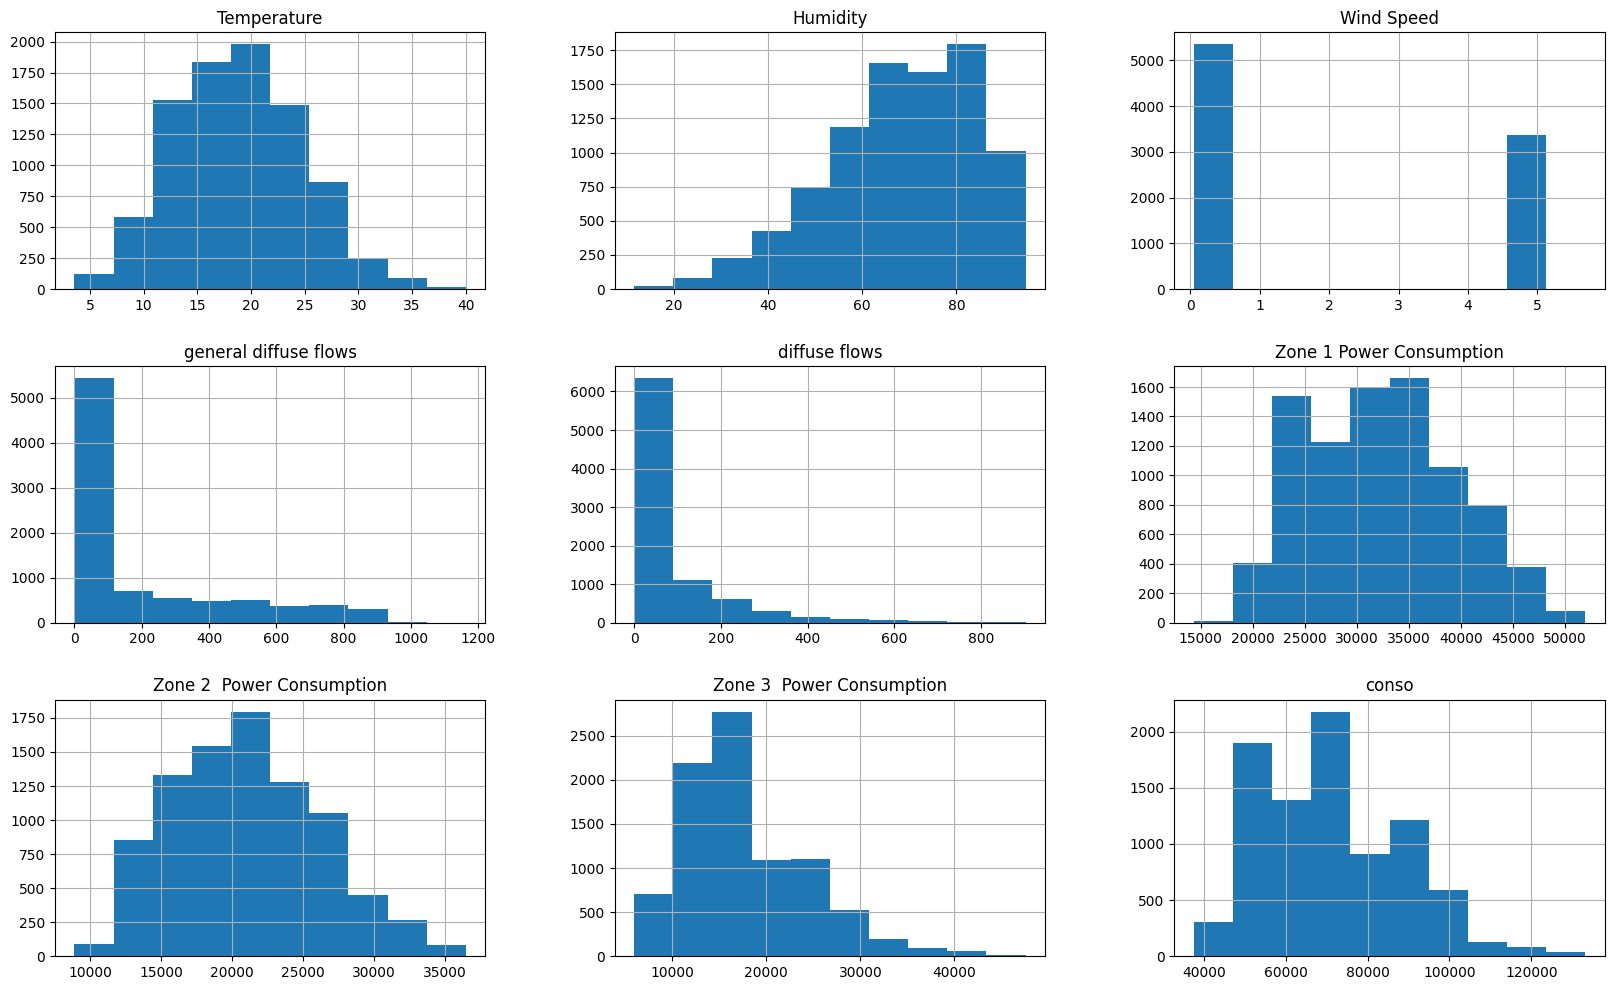

In [19]:
df.hist(figsize=(20, 12))


<Axes: xlabel='conso', ylabel='Temperature'>

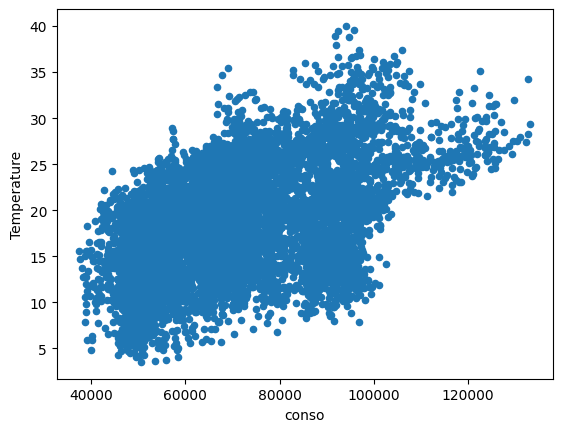

In [20]:
df.plot.scatter(x="conso", y="Temperature")


<Axes: xlabel='conso', ylabel='Humidity'>

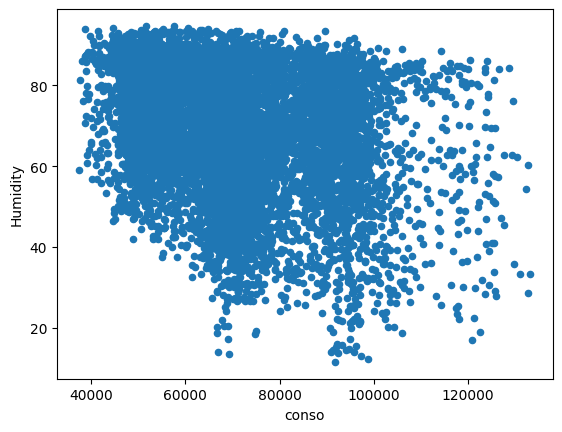

In [21]:
df.plot.scatter(x="conso", y="Humidity")


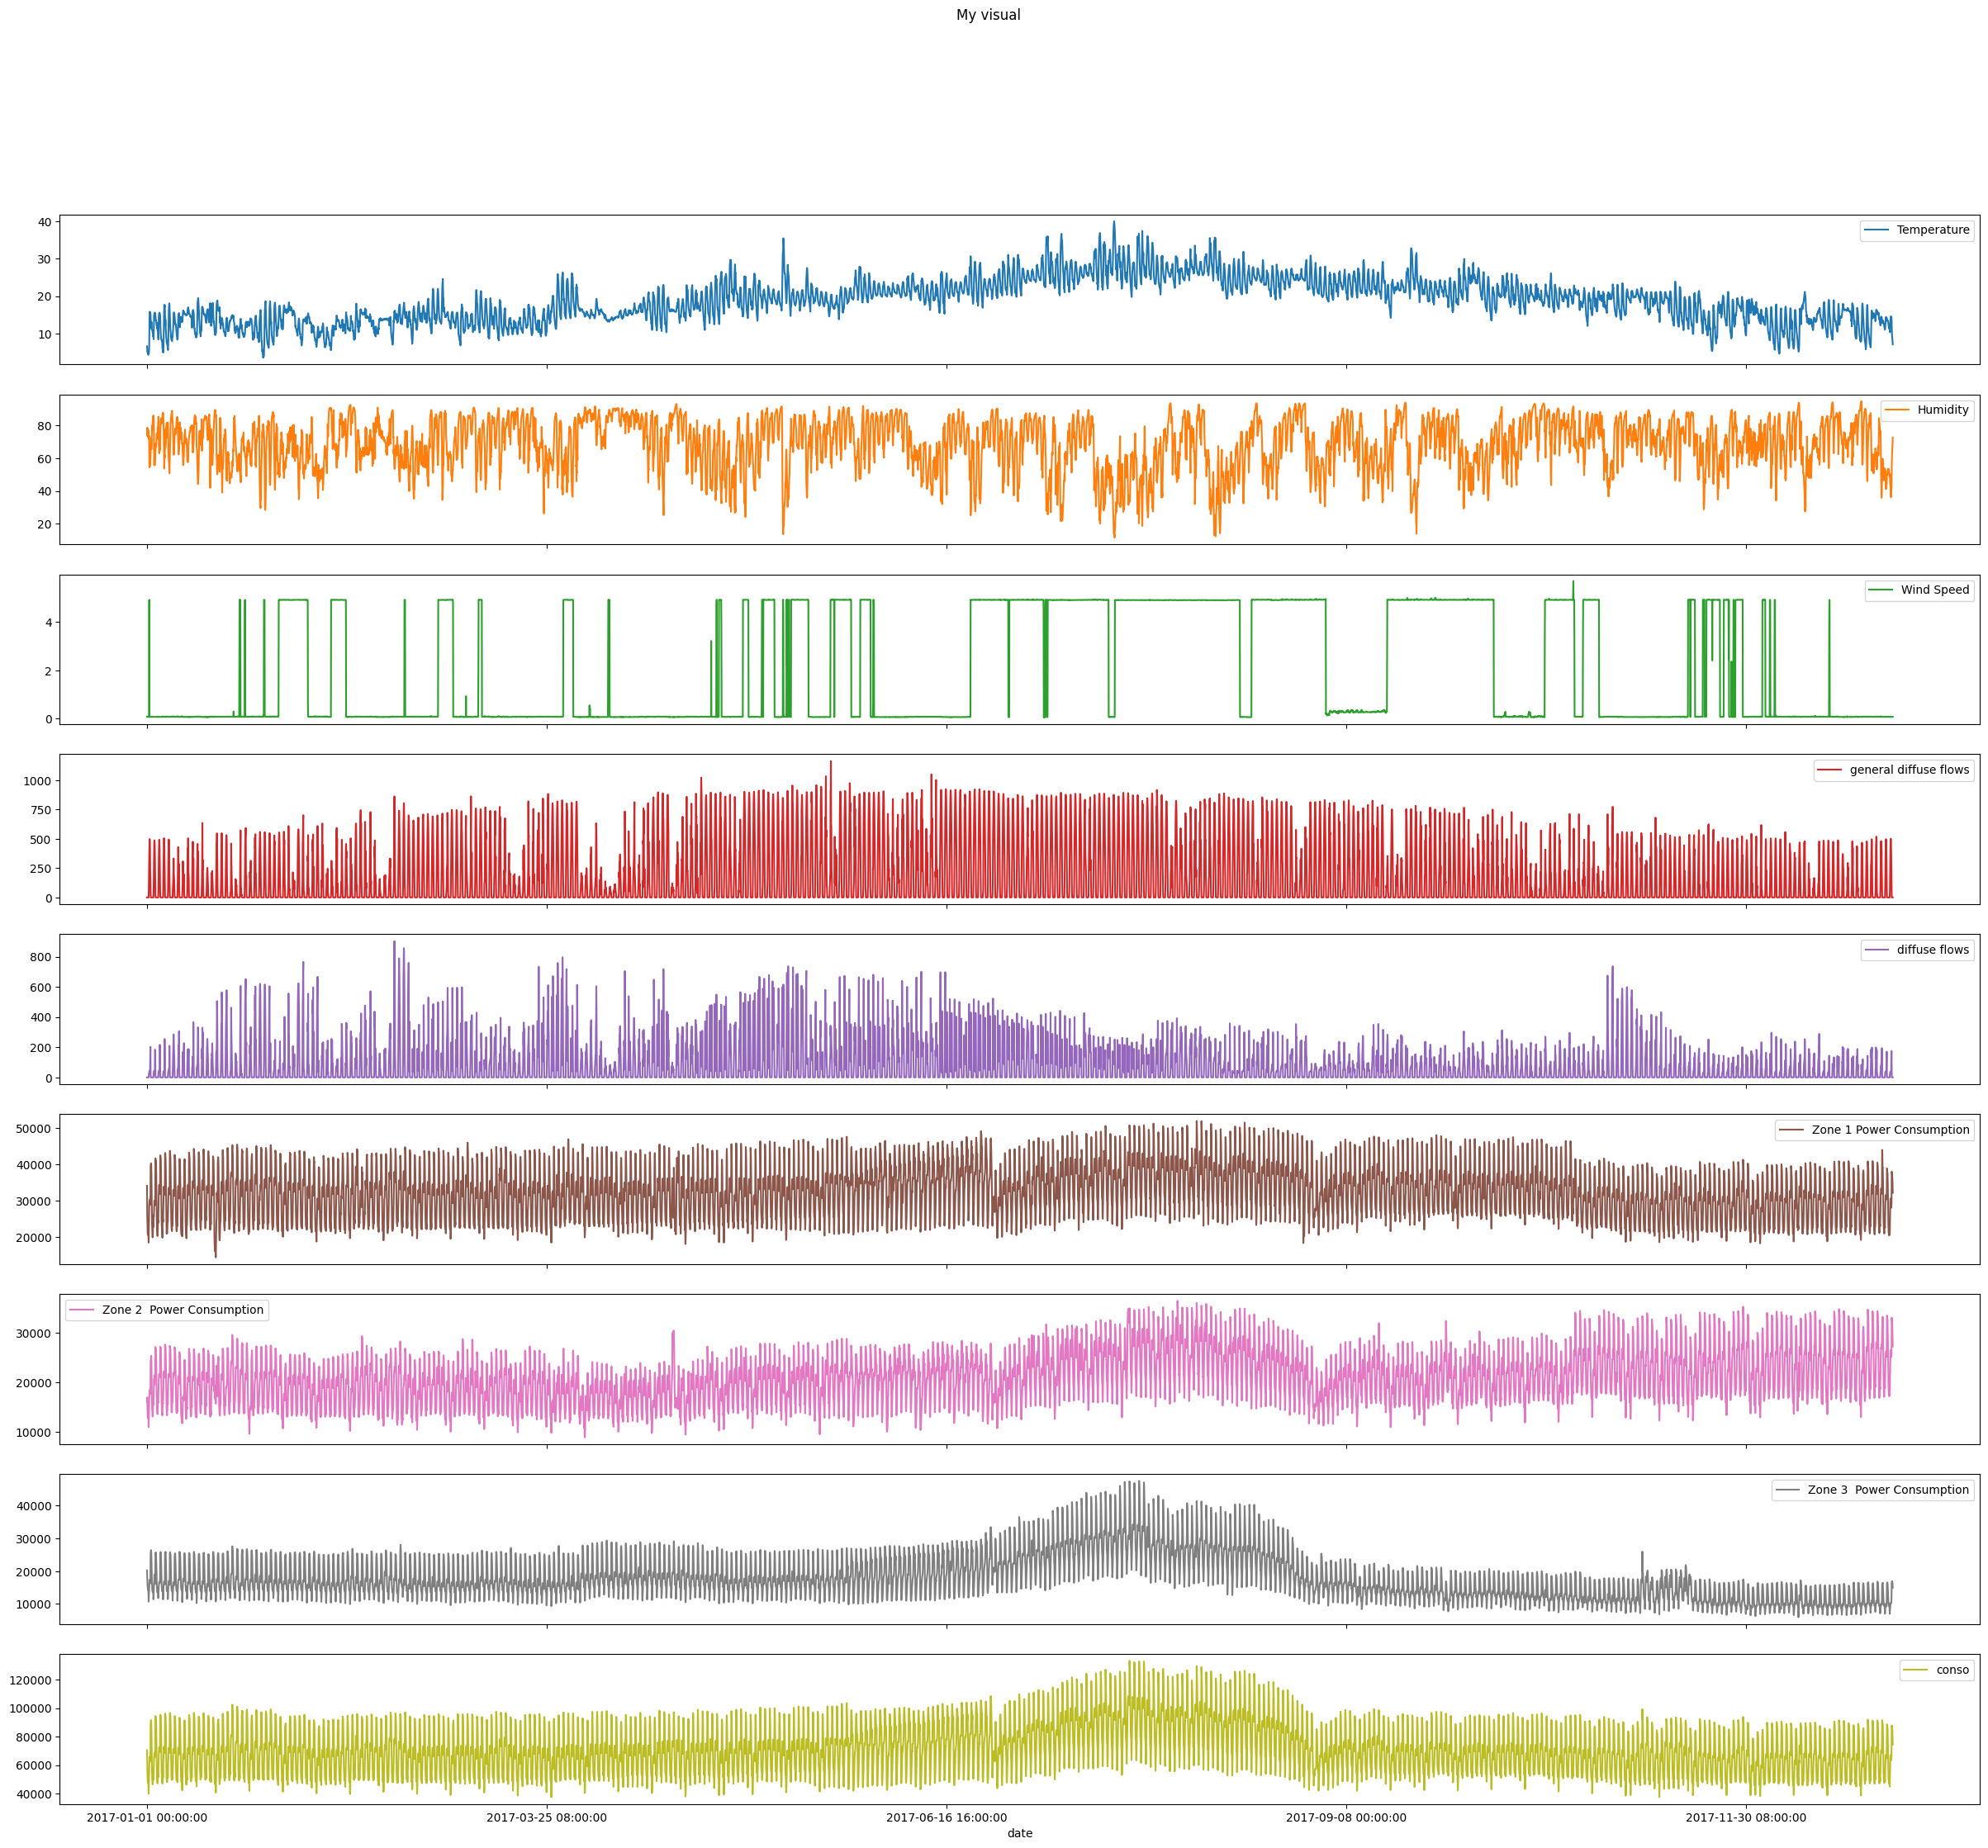

In [22]:
df.plot(subplots=True, figsize=(30, 25), title="My visual")
plt.show()


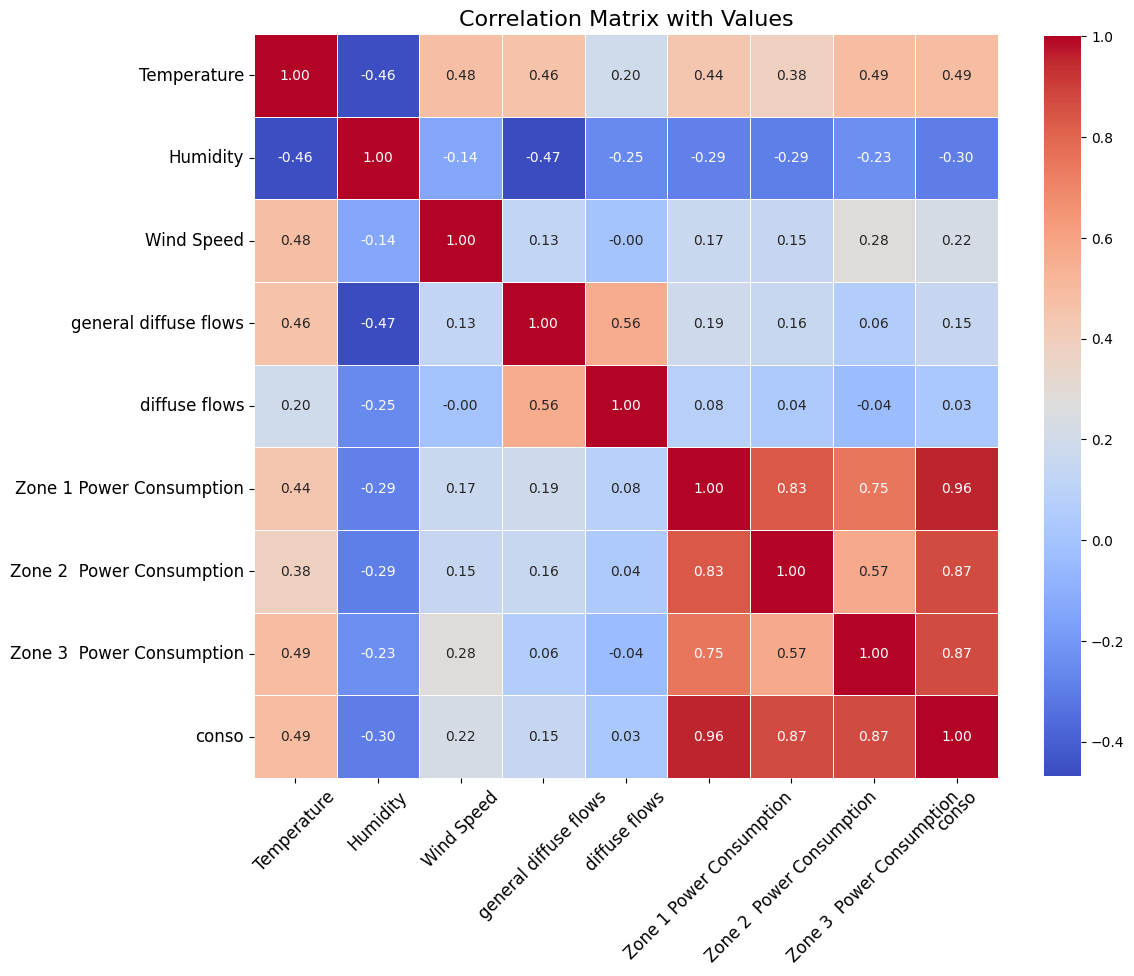

In [23]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))  # Adjust figure size
sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values on the heatmap
    fmt=".2f",             # Format values to 2 decimal places
    cmap="coolwarm",       # Diverging color map (red = negative, blue = positive)
    square=True,           # Keep cells square-shaped
    linewidths=0.5,        # Add clear grid lines between cells
    cbar_kws={"shrink": 0.8}  # Shrink the color bar
)

# Add labels and a title
plt.title("Correlation Matrix with Values", fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.show()


In [24]:
df_ = df.copy()
df_.drop(columns=['Humidity'], inplace=True)
save_path = "../data/raw/tetuancity_data.csv"
df_.to_csv(save_path, index=True)
print(f"Processed dataset saved to {save_path}")


Processed dataset saved to ../data/raw/tetuancity_data.csv


In [25]:
new_data = pd.read_csv(save_path, index_col=0)


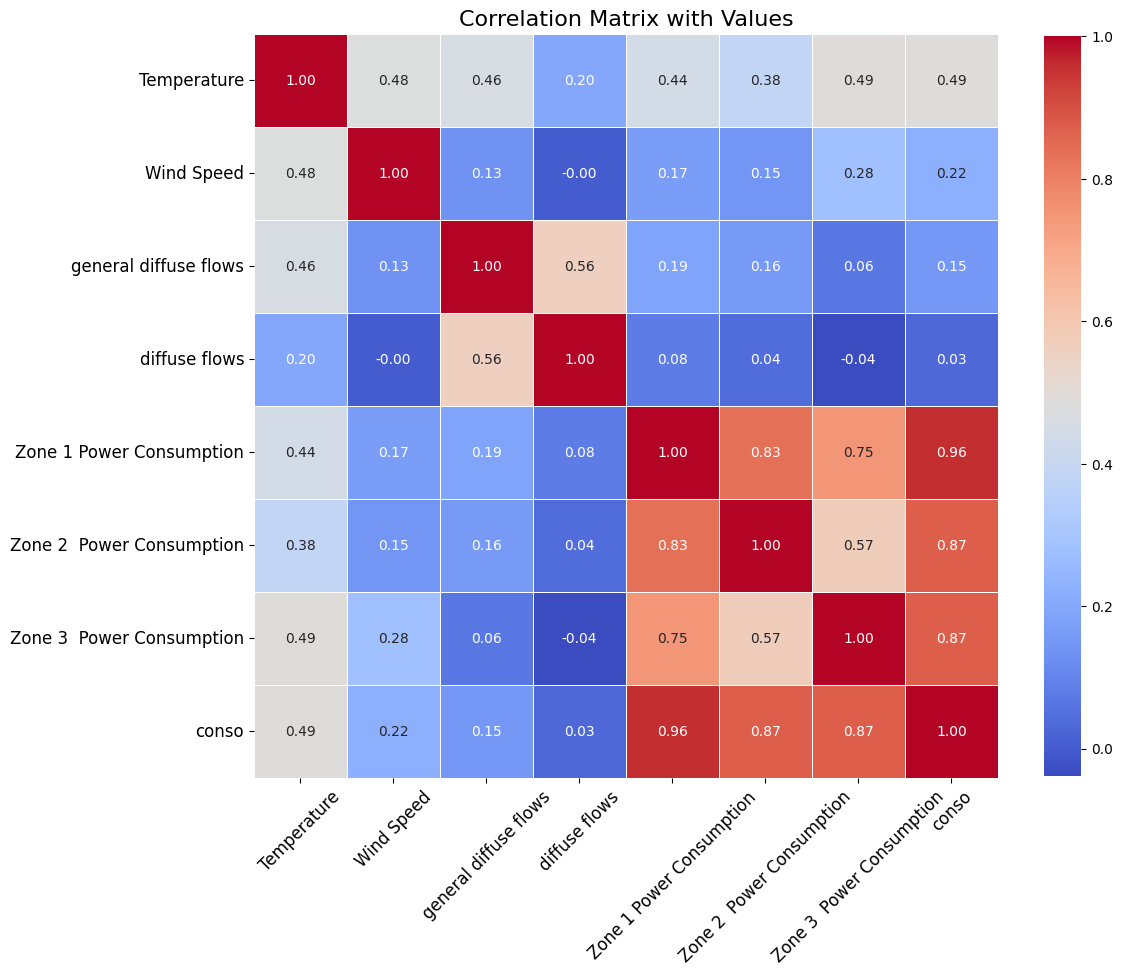

In [26]:
# Calculate the correlation matrix
corr_matrix = new_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))  # Adjust figure size
sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values on the heatmap
    fmt=".2f",             # Format values to 2 decimal places
    cmap="coolwarm",       # Diverging color map (red = negative, blue = positive)
    square=True,           # Keep cells square-shaped
    linewidths=0.5,        # Add clear grid lines between cells
    cbar_kws={"shrink": 0.8}  # Shrink the color bar
)

# Add labels and a title
plt.title("Correlation Matrix with Values", fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.show()
